In [51]:
import seaborn as sns
import pandas as pd

titanic= sns.load_dataset('titanic')

print(titanic.head())
print(titanic.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [52]:
print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [53]:
titanic = titanic.drop(columns = ['deck'])

mean_age = titanic['age'].mean()
titanic['age'] = titanic['age'].fillna(mean_age)


print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


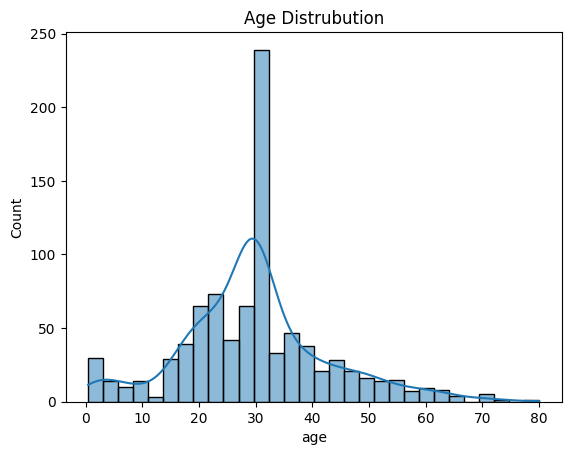

C:\Users\Baki Akgun\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


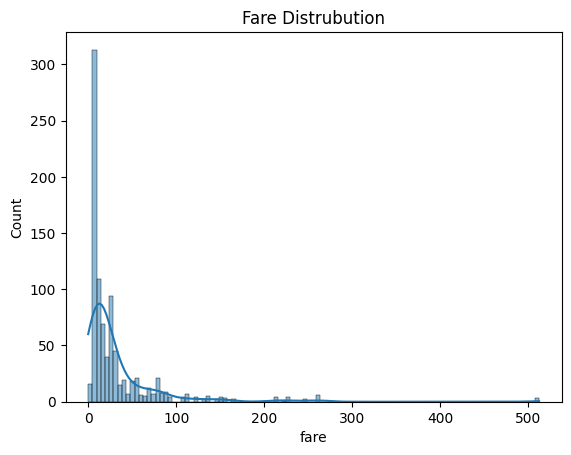

In [56]:
#Visualizate
import matplotlib.pyplot as plt

sns.histplot(titanic['age'].dropna(), kde = True)
plt.title("Age Distrubution")
plt.show()

sns.histplot(titanic['fare'], kde = True)
plt.title('Fare Distrubution')
plt.show()

In [63]:
#Normality Tests
from scipy import stats

#Shapiro-Wilk Test
shapiro_test_age = stats.shapiro(titanic['age'].dropna())
shapiro_test_fare = stats.shapiro(titanic['fare'].dropna())

#D'Agostino's k^2 Test
degostino_test_age = stats.normaltest(titanic['age'].dropna())
degostino_test_fare = stats.normaltest(titanic['fare'].dropna())

#Anderson-Darling Test

anderson_test_age = stats.anderson(titanic['age'].dropna())
anderson_test_fare = stats.anderson(titanic['fare'].dropna())

#Test Results

print(f"Sharpio-Wilk Test(Age): {shapiro_test_age}")
print(f"Shapiro_Wilk Test(Fare): {shapiro_test_fare}")
print("***********************************")
print(f"D’Agostino’s K^2 Test(Age): {degostino_test_age}")
print(f"D’Agostino’s K^2 Test(Fare): {degostino_test_fare}")
print("***********************************")

print(f"Anderson-Darling Test (Age): {anderson_test_age}")
print("-----------------------------------")

print(f"Anderson-Darling Test (Fare): {anderson_test_fare}")

Sharpio-Wilk Test(Age): ShapiroResult(statistic=0.9588214159011841, pvalue=3.972714542180072e-15)
Shapiro_Wilk Test(Fare): ShapiroResult(statistic=0.5218917727470398, pvalue=1.0789998175301091e-43)
***********************************
D’Agostino’s K^2 Test(Age): NormaltestResult(statistic=43.858965850515766, pvalue=2.9932746976104566e-10)
D’Agostino’s K^2 Test(Fare): NormaltestResult(statistic=904.5872705326926, pvalue=3.727091062842147e-197)
***********************************
Anderson-Darling Test (Age): AndersonResult(statistic=15.317882721583487, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=29.69911764705882, scale=13.002015226002884)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
-----------------------------------
Anderson-Darling Test (Fare): AndersonResult(statistic=122.16962721459197, critical_values=array([0.573, 0.653, 0.784, 0.914

In [78]:
#Correlation Tests
print("*Correlation Tests*")
#pearson corelation test
pearson_corr = titanic[['age','fare']].corr(method='pearson')
print(f"Pearson:\n{pearson_corr}")
print("\n")
#spearman corelation test
spearman_corr = titanic[['age','fare']].corr(method='spearman')
print(f"Spearman:\n{spearman_corr}")
print("\n")
#kendall corelation test
kendall_corr = titanic[['age','fare']].corr(method='kendall')
print(f"kendall:\n{kendall_corr}")

print("\n")

#CHİ-Squared test
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(titanic['sex'], titanic['class'])

chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Squared Statisctics: {chi2_stat}")
print(f"P-Value: {p_val}")

*Correlation Tests*
Pearson:
           age      fare
age   1.000000  0.091566
fare  0.091566  1.000000


Spearman:
           age      fare
age   1.000000  0.118847
fare  0.118847  1.000000


kendall:
           age      fare
age   1.000000  0.080726
fare  0.080726  1.000000


Chi-Squared Statisctics: 16.971499095517114
P-Value: 0.00020638864348233114


In [87]:
#Stationary Tests
##İmportant: there isnot any date column.
#Augmented Disckey_Fller(Adf) Test(time column)
from statsmodels.tsa.stattools import adfuller

result = adfuller(titanic['age'].dropna())

print('ADF Statistic:',  result[0])
print('p-value: ', result[1])
print('Critical Values: ', result[4])
print("***********************************")


#Kwiatkowski-Phillips- Schmidt-Shin(KPSS)
from statsmodels.tsa.stattools import kpss

result = kpss(titanic['age'].dropna(),regression = 'c')

print('KPSS Statistic:', result[0])
print('p-value: ', result[1])
print('Critical Values:', result[3])

ADF Statistic: -28.826313471329495
p-value:  0.0
Critical Values:  {'1%': -3.43771883253448, '5%': -2.8647929301713977, '10%': -2.568502085595253}
***********************************
KPSS Statistic: 0.26545874521238416
p-value:  0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


C:\Users\Baki Akgun\AppData\Local\Temp\ipykernel_840\516856713.py:17: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(titanic['age'].dropna(),regression = 'c')


In [93]:
#Parametric Statistical Hypothesis Tests

#Student's t-test
print("Student's t-test ")
from scipy.stats import ttest_ind

group1 = titanic[titanic['class'] == 'First']['age'].dropna()
group2 = titanic[titanic['class'] == 'Second']['age'].dropna()

t_stat, p_value = ttest_ind(group1, group2)
print('T-Statistic:' , t_stat)
print('P-Value', p_value)

print("***********************************")

#Anova Test
from scipy.stats import f_oneway

group1 = titanic[titanic['class'] == 'First']['age'].dropna()
group2 = titanic[titanic['class'] == 'Second']['age'].dropna()
group3 = titanic[titanic['class'] == 'Third']['age'].dropna()

f_stat, p_value = f_oneway(group1, group2, group3)
print('F-Statistic:' , f_stat)
print('P-Value', p_value)

print("***********************************")

#Repeated Anova test



Student's t-test 
T-Statistic: 5.17539756047137
P-Value 3.6151399535758465e-07
***********************************
F-Statistic: 56.57438528337172
P-Value 7.481182472787439e-24


In [99]:
# NonParametric StatisticalHypothesis Tests

#Mann-Whitney U Testi
print("Mann-Whitney Test")

from scipy.stats import mannwhitneyu

group1 = titanic[titanic['class'] == 'First']['age'].dropna()
group2 = titanic[titanic['class'] == 'Second']['age'].dropna()

u_stat,p_value = mannwhitneyu(group1, group2)
print('_Statistic:', u_stat)
print('P-Vale: ', p_value)

print("***********************************")
print("Kruskal-Wallis H Test")


#Kruskal-Wallis H Test
from scipy.stats import kruskal

group1 = titanic[titanic['class'] == 'First']['age'].dropna()
group2 = titanic[titanic['class'] == 'Second']['age'].dropna()
group3 = titanic[titanic['class'] == 'Third']['age'].dropna()

h_stat, p_value = kruskal(group1, group2, group3)
print('H-Statistic:', h_stat)
print('P-Value:', p_value)


Mann-Whitney Test
_Statistic: 25337.5
P-Vale:  2.076685918938379e-06
***********************************
Kruskal-Wallis H Test
H-Statistic: 89.97967689104597
P-Value: 2.891754508717626e-20
